In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install moviepy

# Option 1: Create movie from image stack

In [1]:
# import necessary libraries 
import os
from moviepy.editor import ImageClip, concatenate_videoclips
from IPython.display import Image

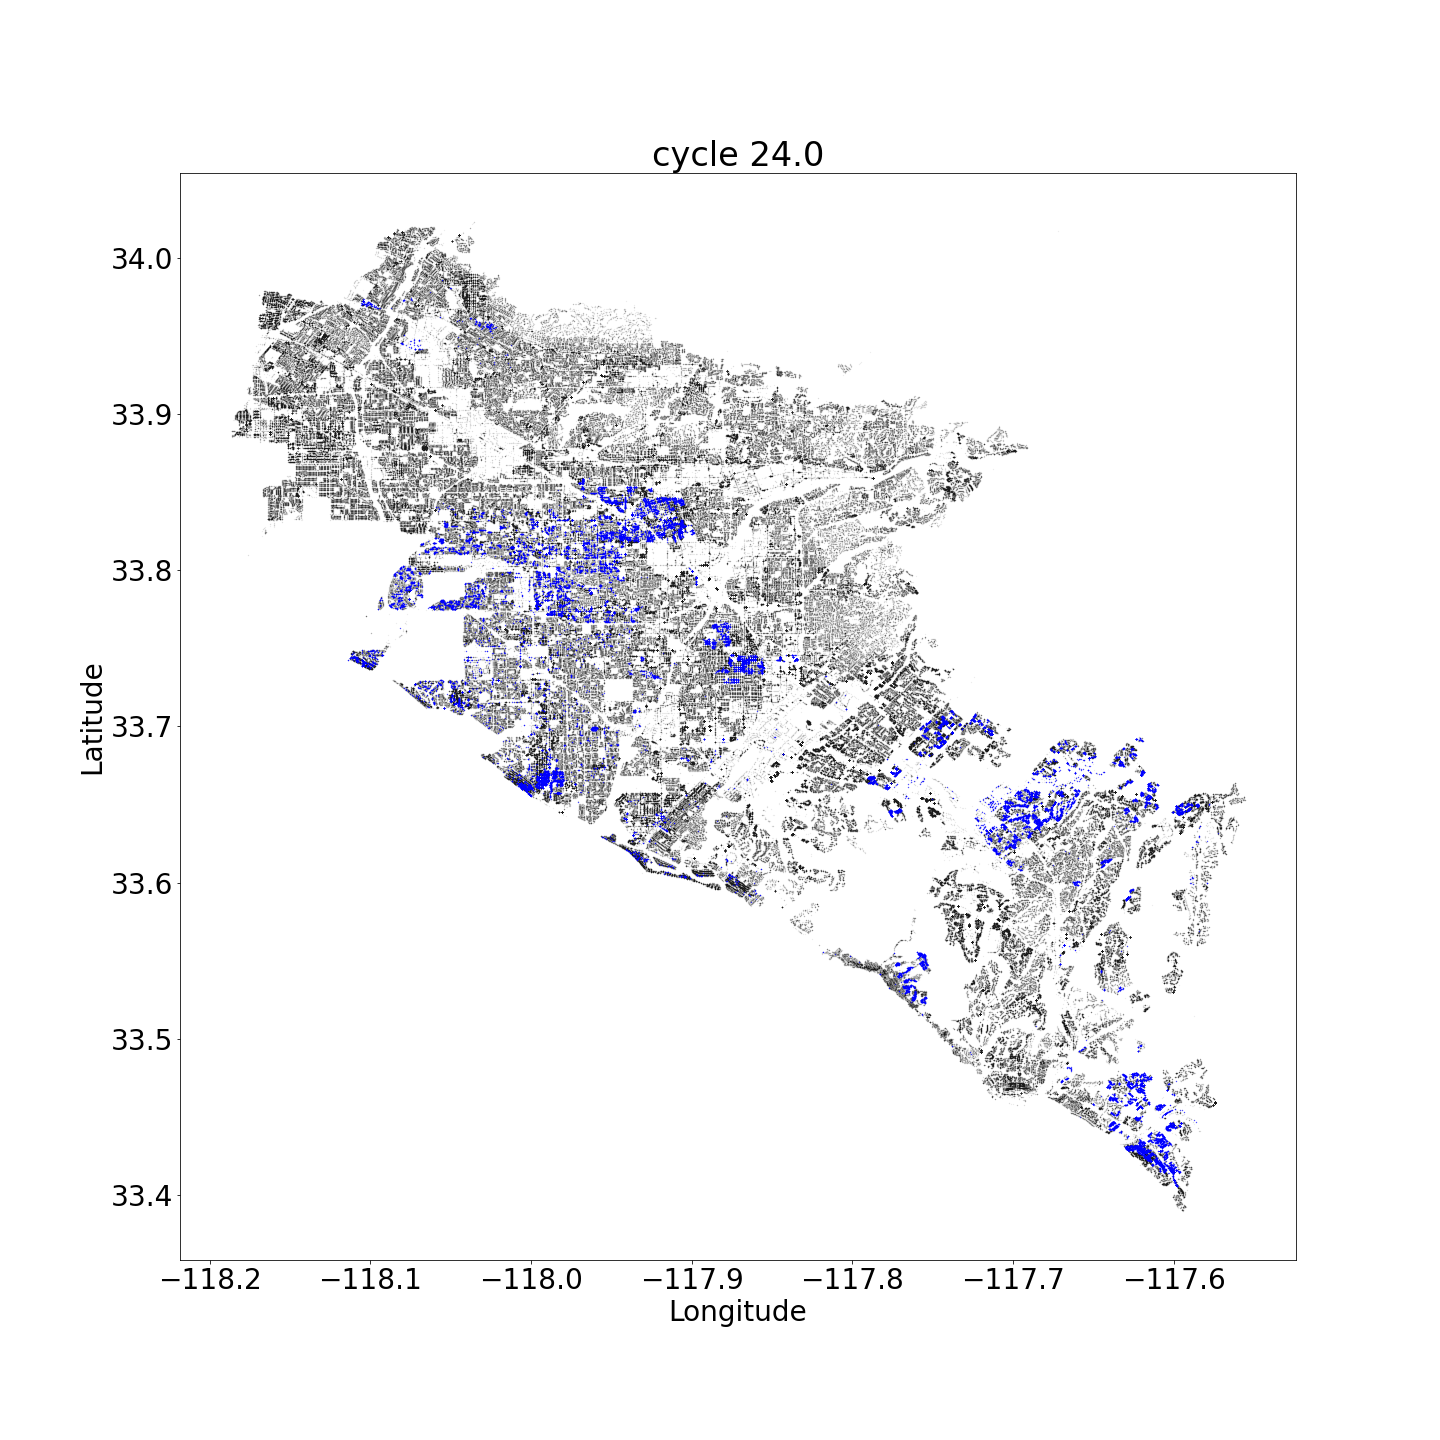

In [3]:
# image directory and find all file names within there
img_dir = os.getcwd() + '\\MSAI_cycle_change\\raw_images\\ANA_new\\'
img_names = os.listdir(img_dir)
img_files = [img_dir + k for k in img_names]

# view one image
Image(filename = img_files[3])

In [5]:
# set duration for each image to be 2 seconds. created via list comprehension (i.e. single line for loop)
clips = [ImageClip(m).set_duration(2) for m in img_files]

# stack clips and save video file
concat_clip = concatenate_videoclips(clips)
concat_clip.write_videofile(os.getcwd() + '\\MSAI_cycle_change\\ANA_new.mp4', fps = 24)

Moviepy - Building video C:\Users\JCheung1\OneDrive - Sempra Energy\documents\GitHub\bookshelf\MoviePy\MSAI_cycle_change\ANA_new.mp4.
Moviepy - Writing video C:\Users\JCheung1\OneDrive - Sempra Energy\documents\GitHub\bookshelf\MoviePy\MSAI_cycle_change\ANA_new.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\JCheung1\OneDrive - Sempra Energy\documents\GitHub\bookshelf\MoviePy\MSAI_cycle_change\ANA_new.mp4


# Option 2: Animate a time-series plot


In [8]:
import os

# scientific computing and plotting tools
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# moviepy functions
import moviepy as mpy
from moviepy.editor import VideoClip, VideoFileClip, clips_array
from moviepy.video.io.bindings import mplfig_to_npimage

In [9]:
# top level parameters for data/video directory and video length
animation_duration = 20 # in seconds
video_directory = os.getcwd() + '\\localization_trial_animation\\raw\\test_video.mp4'
ds = sio.loadmat(os.getcwd() + '\\localization_trial_animation\\raw\\cell_29.mat')['export_struct'][0,0]
# trial = np.random.choice(ds['thetaAtBase'].shape[1],1)[0] # sample a random trial
trial = 87

In [10]:
# step 1) load and edit video clip
video_clip = VideoFileClip(video_directory,  audio=False)

# video editing via rotation and forcing clip size
video_clip = mpy.video.fx.all.speedx(video_clip,final_duration = animation_duration)
video_clip = mpy.video.fx.all.rotate(video_clip, -90, unit='deg')
video_clip = mpy.video.fx.all.mirror_x(video_clip)
video_clip = mpy.video.fx.all.resize(video_clip,0.8)

#use this to view video 
video_clip.ipython_display(maxduration = 200) 

t:   0%|                                                                             | 0/500 [00:00<?, ?it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


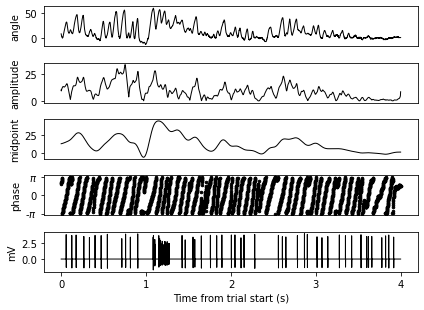

In [11]:
# step 2) load and edit time-series plots

# top level definitions 
duration= animation_duration # duration of animation in seconds
my_dpi = 168 # find here https://www.infobyip.com/detectmonitordpi.php
fig_size = np.array(video_clip.size)/my_dpi # time-series to match video size
plt.rcParams.update({'font.size':10})

# Define variables for clip 2 time-series
x = np.arange(0,len(ds['thetaAtBase']))
y0 = ds['thetaAtBase'][:,trial]
y1 = ds['amplitude'][:,trial]
y2 = ds['setpoint'][:,trial]
y3 = ds['phase'][:,trial]
y4 = ds['spikes_trace'][:,trial]

# Set up plots for animation 
fig, ax = plt.subplots(5,1, figsize = (6,fig_size[1]*2))
l0, = ax[0].plot(x, y0, lw=1, c='k')
l1, = ax[1].plot(x, y1, lw=1, c='k')
l2, = ax[2].plot(x, y2, lw=1, c='k')
l3, = ax[3].plot(x, y3, 'k.',markersize=5)
l4, = ax[4].plot(x, y4, lw=1, c='k')

labels = ['angle', 'amplitude', 'midpoint', 'phase', 'mV']
for ix, k in enumerate(ax):
    ax[ix].set_xticks([])
    ax[ix].set_ylabel(labels[ix])
ax[3].set_yticks([-3.14, 0, 3.14])
ax[3].set_yticklabels(['-$\pi$',0,'$\pi$'])
ax[4].set_xticks([0,1000,2000,3000,4000])
ax[4].set_xticklabels([0,1,2,3,4])
ax[4].set_xlabel("Time from trial start (s)")
fig.tight_layout() 

In [12]:
# Animate figure with moviepy 
def make_frames(t):
    t_idx = int((len(x)/duration) * t) #size of each step 
    for idx,val in enumerate(ax):
        exec('l' + str(idx) + '.set_xdata(x[:t_idx])')
        exec('l' + str(idx) + '.set_ydata(y' + str(idx) +'[:t_idx])')
    return mplfig_to_npimage(fig)

plot_clip = VideoClip(make_frames, duration=duration)

In [13]:
# Step 3) stitch together final clip side by side. 
# clips_array requires margins to be added 
final_clip = clips_array([[clip.margin(2, color=[255,255,255]) for clip in
                [video_clip, plot_clip]]],
                bg_color=[255,255,255])

final_clip.write_videofile(os.getcwd() + '\\trial_animation.mp4', fps=20)

t:   0%|                                                                             | 0/400 [00:00<?, ?it/s, now=None]

Moviepy - Building video C:\Users\JCheung1\OneDrive - Sempra Energy\documents\GitHub\bookshelf\MoviePy\trial_animation.mp4.
Moviepy - Writing video C:\Users\JCheung1\OneDrive - Sempra Energy\documents\GitHub\bookshelf\MoviePy\trial_animation.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\JCheung1\OneDrive - Sempra Energy\documents\GitHub\bookshelf\MoviePy\trial_animation.mp4
